### Table of contents <a id='menu'>

* [0. Data Collected](#dc)
* [1. Data Validation & Cleaning](#dvc)
     
    @ Insights
* [2. EDA](#eda)
    
    @Predictive Modelling
* [3. x,y](#xy)
* [4. Feature Selection of X](#fsox)
* [5. Train-Test split](#tts)
* [6. Na & Out of Train & Test](#nott)
* [7. Pre-Processing of xtrain & xtest](#ppxt)
* [8. Modelling](#model)
* [9. Model Performance](#mp)
* [10. RealTimePredictions](#rtp)

**Python Libraries Required**

In [1]:
# Data Mining
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")

### 0. Data Collected <a id='dc'>
    
[Back to Top](#menu)

* The collected Fuel_Consumption dataset we will check each and every column data properly

In [4]:
# Loading Dataset

rawdata = pd.read_csv("Fuel_Consumption.csv.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Fuel_Consumption.csv.xlsx'

In [ ]:
rawdata.columns

**Fuel_Consumption_Dataset Features Info**:

Column|Description
-----------|--------
Model Year|Model release year
Make|The Brand of the vehicle
Model|Model refers to the specific vehicle model
Vehicle Class|The capacity of vehicle
Engine Size|Total displacement of all cylinders (in litres [L]); electric motor peak power output (in kilowatts [kW]); number of engine
cylinders
Cylinders|Number of Cylinders
Transmission|A = Automatic; AM = Automated manual; AS = Automatic with select shift; AV = Continuously variable; M = Manual; Number of gears/speeds(1–10)
Fuel Type|X = Regular gasoline; Z = Premium gasoline; D = Diesel; E = E85; B = Electricity; N = Natural gas
Fuel Consumption (City (L/100 km)|City fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - 
Fuel Consumption(Hwy (L/100 km))|highway fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - 
Fuel Consumption(Comb (L/100 km))|Combined fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - 
Fuel Consumption(Comb (mpg))|The combined rating is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions(g/km)|The tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving
CO2 Rating|The tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
Smog Rating|The tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

**Basic Checks of Fuel_Consumption Dataset**

In [ ]:
rawdata.shape

In [1]:
rawdata.info()

NameError: name 'rawdata' is not defined

* Some of the columns are having missing values
* Some of the numeric columns are in object format , need to convert them

In [ ]:
print("First five rows of Data: ")
display(rawdata.head())

print()

print("Last Five rows of Data: ")
display(rawdata.tail())

**Handling Duplicates**
* Convert categorical columns into lower case for the duplicates check

Note:
* You need to check duplicates before data validation and after data validation

In [ ]:
# converting categorical columns to lower
for i in rawdata.columns:
    if rawdata[i].dtype == object:
        rawdata[i] = rawdata[i].str.lower()

In [ ]:
# check duplicates
rawdata[rawdata.duplicated()] 

In [ ]:
rawdata = rawdata.drop_duplicates().reset_index(drop=True)

**Deleting the Model Year Column**

In [ ]:
del rawdata['Model Year']

In [ ]:
rawdata.head(2)

In [ ]:
rawdata.shape

**Checking Missing values**

In [ ]:
rawdata.isnull().sum()

### 1. Data Validation & Cleaning <a id='dvc'>
[Back to top](#menu)

**Checking each and every column data**
* We are using string methods for this entire analysis
* Here i am Modifying the all columns data

In [ ]:
rawdata.rename(columns={'Engine Size(L)':"Engine_Size_L",
                        'Fuel Type':"Fuel_Type", 
                        'Vehicle Class':'Vehicle_Class',
                        'Fuel Consumption (City (L/100 km)':"Fuel_Consumption_City_L_100_km",
                        'Fuel Consumption(Hwy (L/100 km))':"Fuel_Consumption_Hwy_L_100_km",
                        'Fuel Consumption(Comb (L/100 km))':"Fuel_Consumption_Comb_L_100_km",
                        'Fuel Consumption(Comb (mpg))':"Fuel_Consumption_Comb_mpg",
                        'CO2 Emissions(g/km)':"CO2_Emissions_g_km",
                        'CO2 Rating':"CO2_Rating",
                        'Smog Rating':"Smog_Rating"},inplace=True)

In [ ]:
rawdata.head()

* Data is valid, belongs to make
* replacing Special characters  
    - we will be using replace method in pandas

            str.replace -  will be used to replace any character in string
            replace -  will be used to replace entire string

**Make**

In [ ]:
rawdata.Make = rawdata.Make.str.replace("-","_").str.replace(" ","_")

In [ ]:
rawdata.Make.unique(),rawdata.Make.nunique(),rawdata.Make.dtype

* Data is valid
* Replace the Special charcters in the Make column.

**Model**

In [ ]:
rawdata.Model = rawdata.Model.str.replace(" ", "_").str.replace("-","_").str.strip("()").str.replace("+", "_").str.replace("/","_")

In [ ]:
rawdata.Model.unique(),rawdata.Model.nunique(),rawdata.Model.dtype

In [ ]:
rawdata.Model.unique()

* Data is valid
* Replace the Special charcters in the Model column

**Vehicle_Class**

In [ ]:
rawdata.Vehicle_Class = rawdata.Vehicle_Class.str.replace(":","_").str.replace("-","_")

In [ ]:
rawdata.Vehicle_Class.unique(),rawdata.Vehicle_Class.nunique(),rawdata.Vehicle_Class.dtype

* Data is valid
* Replace the Special charcters and also replace the column data properly in the Vehicle_Class.

**Transmission**

In [ ]:
rawdata.Transmission.replace({"am8":"Automated manual8","as10":"Automatic with select shift10",
                              "a8":"Automatic8","a9":"Automated9","am7":"Automated manual7",
                              "as8":"Automatic with select shift8","m6":"Manual6",
                              "as6":"Automatic with select shift6","av":"Continuously variable",
                              "as9":"Automatic with select shift9","a10":"Automated10",
                              "a6":"Automated6","m5":"Manual5",
                              "m7":"Manual7","av7":"Continuously variable7",
                              "av1":"Continuously variable1","am6":"Automated manual6",
                              "as7":"Automaticwith select shift7","av8":"Continuously variable8",
                              "av6":"Continuously variable6","av10":"Continuously variable10",
                              "as5":"Automatic with select shift5","a7":"Automated7"},inplace = True)

In [ ]:
rawdata.Transmission = rawdata.Transmission.str.replace(" ","_")

In [ ]:
rawdata.Transmission.unique(),rawdata.Transmission.nunique(),rawdata.Transmission.dtype

* Data is valid
* Replace the Special charcters and also replace the column data properly in the Transmission.

**Fuel_Type**

In [ ]:
rawdata.Fuel_Type = rawdata.Fuel_Type.str.replace(" ","_")

In [ ]:
rawdata.Fuel_Type.unique(),rawdata.Fuel_Type.nunique(),rawdata.Fuel_Type.dtype

In [ ]:
rawdata.Fuel_Type.replace({"z":"Premium_gasoline",
                              "x":"Regular_gasoline",
                              "d":"Diesel",
                              "e":"E85"},inplace = True)

In [ ]:
rawdata.Fuel_Type.unique()

* Data is valid
* Replace the Special charcters and also replace the column data properly.

**Cylinders**

In [ ]:
rawdata.Cylinders.unique(),rawdata.Cylinders.nunique(),rawdata.Cylinders.dtype

**Fuel_Consumption_City_L_100_km**

In [ ]:
rawdata.Fuel_Consumption_City_L_100_km.unique(),rawdata.Fuel_Consumption_City_L_100_km.nunique(),rawdata.Fuel_Consumption_City_L_100_km.dtype

**Fuel_Consumption_Hwy_L_100_km**

In [ ]:
rawdata.Fuel_Consumption_Hwy_L_100_km.unique(),rawdata.Fuel_Consumption_Hwy_L_100_km.nunique(),rawdata.Fuel_Consumption_Hwy_L_100_km.dtype

**Fuel_Consumption_Comb_L_100_km**

In [ ]:
rawdata.Fuel_Consumption_Comb_L_100_km.unique(),rawdata.Fuel_Consumption_Comb_L_100_km.nunique(),rawdata.Fuel_Consumption_Comb_L_100_km.dtype

**Fuel_Consumption_Comb_mpg**

In [ ]:
rawdata.Fuel_Consumption_Comb_mpg.unique(),rawdata.Fuel_Consumption_Comb_mpg.nunique(),rawdata.Fuel_Consumption_Comb_mpg.dtype

**CO2_Emissions_g_km**

In [ ]:
rawdata.CO2_Emissions_g_km.unique(),rawdata.CO2_Emissions_g_km.nunique(),rawdata.CO2_Emissions_g_km.dtype

**CO2_Rating**

In [ ]:
rawdata.CO2_Rating.unique(),rawdata.CO2_Rating.nunique(),rawdata.CO2_Rating.dtype

**Smog_Rating**

In [ ]:
rawdata.Smog_Rating.unique(),rawdata.Smog_Rating.nunique(),rawdata.Smog_Rating.dtype

In [ ]:
rawdata.head(5)

### Data Understanding  
## 2. EDA (Exploratory Data Analysis): <a id='eda'>

[Back to Top](#menu)
* We can get insights on dataset using Exploratory Data Analysis (EDA) methods

* EDA can be of two things, 
    - Statistics
        - Descriptive
        - Inferential
    - Visual Analysis

In [ ]:
rawdata.head()

**Understanding Column Data Types in stats point of view**

In [ ]:
rawdata.dtypes

**Numerical and Categorical data**

Numerical(Quantitative) | Categorical(Qualitative)
--|---------------------
Engine_Size_L | Make
Cylinders|Model
Fuel_Consumption_City_L_100_km| Vehicle_Class
Fuel_Consumption_Hwy_L_100_km| Transmission
Fuel_Consumption_Comb_L_100_km| Fuel_Type
Fuel_Consumption_Comb_mpg|-
CO2_Emissions_g_km|-  
CO2_Rating |-
Smog_Rating|-

* Columns for analysis
    * Vehicle:
        - 'Make', 'Model', 'Vehicle_Class', 'Cylinders', 'Transmission','Engine_Size'
    * Fuel:
        - 'Fuel_Consumption_(City)','Fuel_Consumption_(Highway)','Fuel_Consumption_(Comb)','Fuel_Consumption_(Comb)(mpg)' 
    * Gas
        - 'CO2_Emission'
    * Rating
        - 'CO2_Rating','Smog_Rating'		


**When we have input and ouput variables mentioned,**

* Taking important input columns to analysis with reference to the output variable is suggested for analysis.

**For this data we have output variable Fuel_Consumption_Comb_L_100_km , so**

* All the Columns are using for analysis

### Analysis

EDA is divided into three types of analysis


Uni-Variate|Bi-Variate|Multi-Variate
---|---|----
Data study of single column|Data study between two columns|Data Study b/w three or more columns

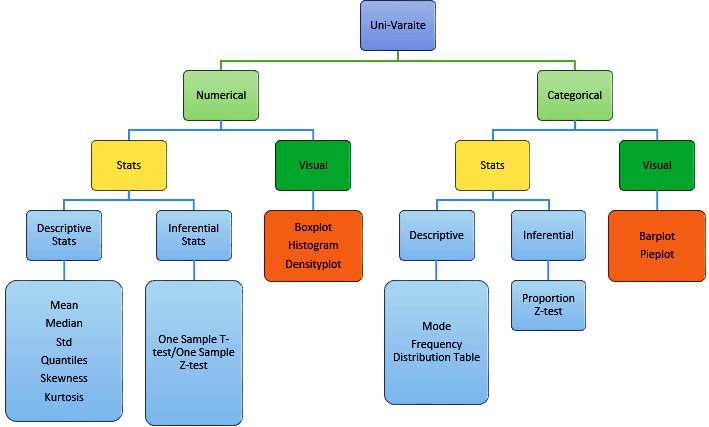

In [ ]:
rawdata.info()

In [ ]:
rawdata.columns, rawdata.dtypes

In [ ]:
rawdata.Fuel_Consumption_Comb_L_100_km.describe()

In [ ]:
rawdata.Fuel_Consumption_Comb_L_100_km.value_counts(),rawdata.Fuel_Consumption_Comb_L_100_km.median(),rawdata.Fuel_Consumption_Comb_L_100_km.unique(),rawdata.Fuel_Consumption_Comb_L_100_km.nunique()

In [ ]:
rawdata.Fuel_Consumption_Comb_L_100_km.mean(), rawdata.Fuel_Consumption_Comb_L_100_km.median(), rawdata.Fuel_Consumption_Comb_L_100_km.std()

**Uni-Variate analysis on Categorical** 

In [ ]:
rawdata.Make.value_counts(),rawdata.Make.mode()

In [ ]:
plt.figure(figsize=(6,3))
rawdata['Make'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
rawdata.Vehicle_Class.value_counts(),rawdata.Vehicle_Class.mode()

In [ ]:
plt.figure(figsize=(8,3))
rawdata['Vehicle_Class'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
rawdata.Transmission.value_counts(),rawdata.Transmission.mode()

In [ ]:
plt.figure(figsize=(6,4))
rawdata['Transmission'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
rawdata.Fuel_Type.value_counts(),rawdata.Fuel_Type.mode()

In [ ]:
plt.figure(figsize=(6,3))
rawdata['Fuel_Type'].value_counts().plot(kind='pie')
plt.show()

**Complete uni-variate Analysis**

In [ ]:
from simple_colors import *

for i in rawdata.columns:
    if rawdata[i].dtype == 'object' or rawdata[i].dtype == 'int32' or rawdata[i].dtype == 'int64':
        print()
        print(cyan("Categorical/Numeric Discrete Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(black("Classes:", ['bold']), rawdata[i].unique())
        print(black("Number of Classes:", ['bold']), rawdata[i].nunique())
        print(black("Value Counts of each class:", ['bold']),rawdata[i].value_counts())
        print(black('Class Percent:', ['bold']))
        print((rawdata[i].value_counts() / rawdata[i].value_counts().sum()) * 100)
        print("---------------------------------------------------")
        print(black("Mode Value:", ['bold']), rawdata[i].mode()[0])
        if rawdata[i].nunique() <= 10:
            print()
            print(magenta("Visual Analysis:", ['bold']))
            print("-----------------------------------------------------")
            plt.figure(figsize=(8, 3))
            rawdata[i].value_counts().plot(kind='pie')
            plt.show()

    elif rawdata[i].dtype != 'object':
        print()
        print(blue("Numerical Column:", ['bold']), i)
        print("=====================================================")
        print(green("Uni-Variate Descriptive Stats:", ['bold']))
        print(round(rawdata[i].describe(), ))
        print("-----------------------------------------------------")
        print(black("Skewness & Kurtosis:", ['bold']), rawdata[i].skew(), ",",
              rawdata[i].kurt())
        print()
        print(cyan("Visual Analysis:", ['bold']))
        print("-----------------------------------------------------")
        plt.figure(figsize=(8, 6))
        sns.distplot(rawdata[i])
        
        #data[i].plot(kind = 'density')
        
        plt.show()

**Uni-Variate analysis** 

**On Numerical columns**

In [ ]:
rawdata['Cylinders'].describe(),rawdata['Cylinders'].skew(),rawdata['Cylinders'].kurtosis()

In [ ]:
rawdata.Cylinders.plot(kind='box',title='Boxplot of price',ylabel='Cylinders',figsize=(3,2))

In [ ]:
rawdata['Fuel_Consumption_City_L_100_km'].describe(),rawdata['Fuel_Consumption_City_L_100_km'].skew(),rawdata['Fuel_Consumption_City_L_100_km'].kurtosis()

In [ ]:
rawdata.Fuel_Consumption_City_L_100_km.plot(kind = 'hist',color='Salmon')

In [ ]:
rawdata['Fuel_Consumption_Hwy_L_100_km'].describe(),rawdata['Fuel_Consumption_Hwy_L_100_km'].skew(),rawdata['Fuel_Consumption_Hwy_L_100_km'].kurtosis()

In [ ]:
rawdata.Fuel_Consumption_Hwy_L_100_km.plot(kind='density')

In [ ]:
rawdata['Fuel_Consumption_Comb_L_100_km'].describe(),rawdata['Fuel_Consumption_Comb_L_100_km'].skew(),rawdata['Fuel_Consumption_Comb_L_100_km'].kurtosis()

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(rawdata['Fuel_Consumption_Comb_L_100_km'])
rawdata['Fuel_Consumption_Comb_L_100_km'].plot(kind = 'density')
plt.show()

In [ ]:
rawdata['Fuel_Consumption_Comb_mpg'].describe(),rawdata['Fuel_Consumption_Comb_mpg'].skew(),rawdata['Fuel_Consumption_Comb_mpg'].kurtosis()

In [ ]:
rawdata.Fuel_Consumption_Comb_mpg.plot(kind='box',ylabel='Fuel_Consumption_Comb_mpg')

In [ ]:
rawdata['CO2_Emissions_g_km'].describe(),rawdata['CO2_Emissions_g_km'].skew(),rawdata['CO2_Emissions_g_km'].kurtosis()

In [ ]:
rawdata.CO2_Emissions_g_km.plot(kind='density',ylabel='CO2_Emissions_g_km')

In [ ]:
rawdata['CO2_Rating'].describe(),rawdata['CO2_Rating'].skew(),rawdata['CO2_Rating'].kurtosis()

In [ ]:
plt.figure(figsize=(8, 3))
sns.distplot(rawdata['CO2_Rating'])
rawdata['CO2_Rating'].plot(kind = 'density')
plt.show()

In [ ]:
rawdata['Smog_Rating'].describe(),rawdata['Smog_Rating'].skew(),rawdata['Smog_Rating'].kurtosis()

In [ ]:
plt.figure(figsize=(8, 3))
sns.distplot(rawdata['Smog_Rating'])
rawdata['Smog_Rating'].plot(kind = 'density')
plt.show()

**Bi-Variate analysis on N-N**

**Data Study between two columns**

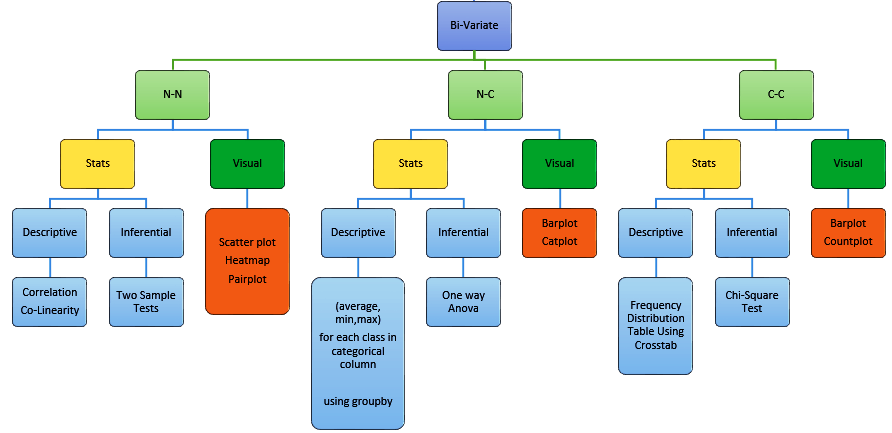

**Numerical to Numerical**

In [ ]:
rawdata.head()

In [ ]:
rawdata[['Fuel_Consumption_City_L_100_km', 'Fuel_Consumption_Comb_L_100_km']].corr()

In [ ]:
sns.scatterplot(rawdata, x='Fuel_Consumption_City_L_100_km', y='Fuel_Consumption_Comb_L_100_km')

In [ ]:
rawdata[['Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_L_100_km']].corr()

In [ ]:
sns.scatterplot(rawdata, x='Fuel_Consumption_Hwy_L_100_km', y='Fuel_Consumption_Comb_L_100_km')

In [ ]:
rawdata[['CO2_Rating', 'Fuel_Consumption_Comb_L_100_km']].corr()

In [ ]:
sns.scatterplot(rawdata, x='CO2_Rating', y='Fuel_Consumption_Comb_L_100_km')

**Numerical - categorical**

In [ ]:
rawdata.head(2)

In [ ]:
((rawdata.groupby("Make")['Fuel_Consumption_Comb_L_100_km'].mean()/len(rawdata))*100).sort_values(ascending  = False)

In [ ]:
sns.barplot(y = rawdata.groupby('Make')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
    ascending=False).index[0:26],
            x = rawdata.groupby('Make')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
                ascending=False).values[0:26],
            orient ='h')

In [ ]:
((rawdata.groupby("Transmission")['Fuel_Consumption_Comb_L_100_km'].mean()/len(rawdata))*100).sort_values(ascending  = False)

In [ ]:
sns.barplot(y = rawdata.groupby('Transmission')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
    ascending=False).index[0:9],
            x = rawdata.groupby('Transmission')['Fuel_Consumption_Comb_L_100_km'].mean().sort_values(
                ascending=False).values[0:9],
            orient ='h')

In [ ]:
((rawdata.groupby("Vehicle_Class")['Fuel_Consumption_Comb_L_100_km'].mean()/len(rawdata))*100).sort_values(ascending  = False)

In [ ]:
sns.catplot(y='Vehicle_Class', x ='Fuel_Consumption_Comb_L_100_km', data = rawdata, orient='h')

In [ ]:
rawdata.corr() 

In [ ]:
sns.heatmap(rawdata.corr(),annot = True)

**Categorical to Categorical**

In [ ]:
rawdata.head(2)

In [ ]:
pd.crosstab(rawdata.Transmission,rawdata.Fuel_Type, margins=True)

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(y='Transmission', hue='Fuel_Type', data = rawdata)

### Overall Insights on data
#### The provided Exploratory Data Analysis (EDA), here are several insights derived from the analysis of the Fuel_consumption dataset:

* Ford has highest value counts in make
* Suv_small has highest value counts in the Vehicle class 
* Automatic with select shift8 has the highest value counts in the Transmission
* Premium gasoline has the highest value counts in the Fuel type
* Ford has highest value counts with 89 and fiat has least value counts with 1
* Suv small occupies 20% of the data and minivan occupies 0.7% of the data
* Engine_size_L has minimum 1 and maximum 8 
* Engine_size_L has postive skewness
* Most vehicles have 4 cylinders with a value count of 404 with percentage of 42%.
* Automatic_with_select_shift8 transmission leads with 212 value count with percentage of 22%.
* Fuel_type premium_gasoline have highest value counts of 458 with a percentage 48%.
* Fuel_Consumption_City_L_100_km of a vehicle minimum's at 4 and maximum's at 30.
* Fuel_Consumption_Hwy_L_100_km of a vehicle minimum's at 4 and maximum's at 21.
* Fuel_Consumption_Comb_L_100_km of a vehicle minimum's at 4 and maximum's at 26.
* Fuel_Consumption_Comb_mpg of a vehicle with a value count of 69.
* CO2_Emissions_g_km 275(g/km) with a value count of 15.
* CO2_Rating of a vehicle has 5 rating with a value count of 266 with a percentage of 1.5%.
* Smog_Rating of a vehicle has 5 rating with a value count of 308 with a percentage of 32%. 
* There are outliers in Cylinders column.
* Fuel_Consumption_Hwy_L_100_km follows normal distribution
* Fuel_Consumption_Comb_L_100_km follows normal distribution 
* There are outliers in Fuel_Consumption_Comb_mpg. 
* CO2_Emissions_g_km follows normal distribution
* CO2_Rating Maximum density at 5
* Smog_Rating Maximum density at 5
* For Fuel_Consumption_City_L_100_km and Fuel_Consumption_Comb_L_100_km have 99% of correlation 
* For Fuel_Consumption_Hwy_L_100_km and Fuel_Consumption_Comb_L_100_km have 96% of correlation. 
* For CO2_Rating and Fuel_Consumption_Comb_L_100_km have -0.92 negative correlation occur
* In Fuel_Consumption_Comb_L_100_km Bugatti has highest value
* Automated6 has hightest in the Transmission and Fuel_Consumption_Comb_L_100_km
* Two seater is more data in the Vehicle_Class and Fuel_Consumption_Comb_L_100_km
* Automatic with select shift6 has hightest premium gasoline in the transmission

### Predictive Modelling<a id='pm'>
[Back To Top](#menu)

**Predictive modelling**
    
* Above data will be given to a machine learning model, where the model will be trained on column data Fuel_Consumption with other columns data.     
    
* predictive modeling is sending data to a algorithm as input columns(x) along with one output column data (y), training y data with x
    
    model: y~x -> y = f(x)+e

### 3. x , y <a id='xy'>
[Back To Top](#menu)

* This is the method where to identify according to business goal,output as y and x as input column 


In [ ]:
# input column
x = rawdata.drop('Fuel_Consumption_Comb_L_100_km',axis = 1) #storing input columns in X and dropping output column

# output column 
y = rawdata['Fuel_Consumption_Comb_L_100_km'] #droped output column will be added to y

* We are predicting the Fuel_Consumption values, so the ouput column will be Fuel_Consumption_Comb_L_100_km, and remaining are input columns

In [ ]:
x.shape,y.shape # After modifying checking shape of the data.

In [ ]:
x.head(2)

In [ ]:
y.head(2)

### 4. Feature Selection of X<a id='fsox'>
[Back To Top](#menu)

* This is method,according to business goal,checking taken input columns are important to our goal/model and if not important considering dropping of columns,for the modelling process. 

* Feature selection/Deletion

The above step can be done through the help of EDA and Business decisions

* Feature Modification (Changing the Values)
* Feature Generation (Creating New Features)
    - We have done some necessary feature modification in Validation Step
    - We will be also doing some necessary steps in data pre-processing

The above steps already taken in Data Validation

In [ ]:
x.head(3)

In [ ]:
x.columns

* Model column is not important for modelling.

In [ ]:
del x['Model']

* Considering remaining all columns for modelling.

### 5. Train-Test Split<a id='tts'>
[Back To Top](#menu)
* This is a method where we divide data into 70:30 as train and test for x and ydata,predictive modelling 
* Dividing Data (x,y) into train and test (Data Validation)
* for this we will use sklearn module
* we can go with 70,30 or 80,20 or 75,25 ratios

In [ ]:
from sklearn.model_selection import train_test_split # Importing traintestsplit for modelselection

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state = 123) # randomstate used for not mismatching the data

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape # Checeking shapes of the data as it is correctly trained or not

In [ ]:
xtrain = xtrain.reset_index(drop = True)
xtest = xtest.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)
# To set index in order after dividing data we use reset_index

* xtrain, ytrain data is used for the training predictive model

* xtest is used for the predictions , ytest is used for the comparissions

### 6. Na & Outliers of Train & Test <a id='nott'>
[Back To Top](#menu)

* Identifying missing values by isnull() function.

**Checking Missing Values**

In [ ]:
xtrain.isnull().sum()

In [ ]:
xtest.isnull().sum()

* There is no null values in the given data

**Outliers Handling**

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(xtrain.Fuel_Consumption_City_L_100_km)

* In [Fuel_Consumption_City_L_100_km] column we have upper out liers.

In [ ]:
plt.figure(figsize=(4,2))
sns.boxplot(xtrain.CO2_Rating)

* In [CO2_Rating] column we have upper out liers.

* The below code used for detecting outliers.

In [ ]:
def outlier_detect(df):
    for i in df.describe().columns:
        print("Column:",i)
        print("------------------------------------------------")
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        print("Lower Outliers:")
        print()
        lowerout = list(df[df[i]<LTV][i])
        lowerout.sort()
        print(lowerout)
        print()        
        print("Upper Outliers:")
        print()
        upperout = list(df[df[i]>UTV][i])
        upperout.sort()
        print(upperout) 
        print()

In [ ]:
outlier_detect(xtest)

In [ ]:
def outlier_replacement(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        
        # replacement vals
        median = df[i].median()
        low_bound = LTV
        high_bound = UTV
        fifth = df[i].quantile(0.05)
        ninetyfifth = df[i].quantile(0.95)
        
        # mask method is used to replace the values
        df[i] = df[i].mask(df[i]<LTV, low_bound) # replacing the outlier with ltv (25% value)
        df[i] = df[i].mask(df[i]>UTV, high_bound) # replacing the outlier with utv (75% value)

In [ ]:
outlier_replacement(xtrain)

In [ ]:
outlier_replacement(xtest)

* Above we have handled the outliers,by using IQR and median.

### 7. Pre-Processing of xtrain & xtest<a id='ppxt'>
[Back To Top](#menu)

**7.1 Categorical to Numerical (Encoding)**

Machine needs data in numeric format, so we need to convert categorical to numerical, while observing the number of classes , because it will increase the dimensionality if we are converting them to one hot encoding.

* Label Encoding for ordinal
    - lets assume cat column data : verygood,good,poor
    - ordinal - verygood>good>poor
                3>2>1
* One hot encodig for nominal
    - lets assume cat column data: a, b, c

a|b|c
--|--|--
1|0|0
1|0|0
0|1|0
0|0|1

**Label encoding**
* Here we are giving manually without using label encoder function.

Regular_gasoline  >  Premium_gasoline  >  Diesel  >  E85

    1    >        2           >      3   >    4

In [ ]:
xtrain.Fuel_Type.replace({'Regular_gasoline':1,
                 'Premium_gasoline':2,
                 'Diesel':3,
                 'E85':4},inplace = True)

In [ ]:
xtest.Fuel_Type.replace({'Regular_gasoline':1,
                 'Premium_gasoline':2,
                 'Diesel':3,
                 'E85':4},inplace = True)

In [ ]:
xtrain

In [ ]:
xtest

**Vehicle_Class**

In [ ]:
xtrain.Vehicle_Class.unique()

In [ ]:
xtrain.Vehicle_Class.replace({'minicompact': 1,'subcompact':2, 'compact':3, 'mid_size':4,
                 'full_size':5,'suv_ small':6,'suv_ standard':7,'two_seater':8,
                 'minivan':9,'station wagon_ small':10,'station wagon_ mid_size':11,
                 'pickup truck_ small':12,'pickup truck_ standard':13,
                 'special purpose vehicle':14},inplace = True)

In [ ]:
xtest.Vehicle_Class.replace({'minicompact': 1,'subcompact':2, 'compact':3, 'mid_size':4,
                 'full_size':5,'suv_ small':6,'suv_ standard':7,'two_seater':8,
                 'minivan':9,'station wagon_ small':10,'station wagon_ mid_size':11,
                 'pickup truck_ small':12,'pickup truck_ standard':13,
                 'special purpose vehicle':14},inplace = True)

In [ ]:
xtrain.head(2)

In [ ]:
xtest.head(2)

**Transmission**

In [ ]:
xtrain.Transmission.unique()

In [ ]:
xtrain.Transmission.replace({'Continuously_variable1': 1,'Manual5':2, 'Automatic_with_select_shift5':3,
                            'Manual6':4,'Automatic_with_select_shift6':5,'Continuously_variable6':6,'Automated_manual7':7,
                            'Automaticwith_select_shift7':8,'Manual7':9,'Automatic8':10,
                            'Automatic_with_select_shift8':11,'Automated_manual8':12,'Continuously_variable8':13,
                            'Continuously_variable7':14,'Automatic_with_select_shift9':15,'Automated9':16,
                            'Automated10':17,'Automated7':18,'Continuously_variable10':19,
                            'Continuously_variable':20,'Automated6':21,'Automated_manual6':22,'Automatic_with_select_shift10':23},inplace = True)

In [ ]:
xtest.Transmission.replace({'Continuously_variable1': 1,'Manual5':2, 'Automatic_with_select_shift5':3,
                            'Manual6':4,'Automatic_with_select_shift6':5,'Continuously_variable6':6,'Automated_manual7':7,
                            'Automaticwith_select_shift7':8,'Manual7':9,'Automatic8':10,
                            'Automatic_with_select_shift8':11,'Automated_manual8':12,'Continuously_variable8':13,
                            'Continuously_variable7':14,'Automatic_with_select_shift9':15,'Automated9':16,
                            'Automated10':17,'Automated7':18,'Continuously_variable10':19,
                            'Continuously_variable':20,'Automated6':21,'Automated_manual6':22,'Automatic_with_select_shift10':23},inplace = True)

In [ ]:
xtrain.head(2)

In [ ]:
xtest.head(2)

* Most the data in the model column are unique values so the size of the data increases so the model get biased so considering all these things we are dropping the model column

In [ ]:
xtrain.Make.nunique()

In [ ]:
xtest.head(2)

In [ ]:
xtrain.Make.nunique()

**OneHot encoding**

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import OneHotEncoder

**Train**

In [ ]:
# fit_transform is used for fitting the data and for transforming data 
ohedata = ohe.fit_transform(np.array(xtrain.Make).reshape(-1,1)).toarray() #reshape used as we took only one column if we dont change the will be in series

In [ ]:
# Converting the one hot data to a data frame with col names
ohedata = pd.DataFrame(ohedata,columns=ohe.get_feature_names_out(['Make']))

In [ ]:
ohedata

In [ ]:
xtrain = pd.concat([xtrain.iloc[:,1:],ohedata], axis = 1)

In [ ]:
xtrain.head(2)

**Test**

In [ ]:
ohedata = ohe.transform(np.array(xtest.Make).reshape(-1,1)).toarray()

In [ ]:
ohedata = pd.DataFrame(ohedata,columns=ohe.get_feature_names_out(['Make']))

In [ ]:
xtest = pd.concat([xtest.iloc[:,1:],ohedata], axis = 1)

In [ ]:
xtest.head(2)

**Scaling Numeric Data (if necessary)**

We need to apply scaling for the input numerical continuous columns which are in different scales only ,not to the one hot encoded vectors

Scaling is not suggested for numerical output column

Scaling is applied based on the model we are using for prediction


**For this data numerical values are in different scales and we are building regression , scaling is suggested**

**We have two scales**

1. Standard Scaler / Standardization (Mostly Suggested)

        x-mean/std 
    
    entire column data can be converted into normal distribution with mean 0 and std 1
    
    
    
2. Normalization

    MinMax Scale

    xi-min(x)/max(x)-min(x)

        data in 0 to 1 range


* We can scale numeric columns when we have huge scale difference if algorithm needed

* For our data we consider scaling is not necessary.

### 8. Modelling<a id='model'>

[Back to Top](#menu)
* Models

y = f(x)+e

* y data is a numeric data , we will be using regression algorithms

* Linear Algorithms (when the data is linear to output (having correlation))
    - Linear Regression
    - Polynomial Regression
    - Lasso & Ridge Regression

* Non-Linear Algorithms (when the data is non-linear to output (not having correlation) using classification algorithms)
    - RandomForest Regressor
    - Xgboost Regressor

**8.1 Importing Libraries and Define Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

**In Sklearn**

* sklearn.preprocessing 
    - Label Encoder, OneHotEncoder, StandardScaler 
        - fit_transform, transform
* sklearn.model_selection
    - train-test split
* sklearn.linear_model
    - LinearRegression 
        - fit, predict
* sklearn.metrics
    - r2_score

**Defining Models**

In [ ]:
# Multiple Linear Regression 

mlr = LinearRegression()

# Polynomial Regression

polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam

poly = LinearRegression()

# Lasso (L1) & Ridge (L2)

lasso = Lasso(alpha = 5) # alpha - hyperparam - penalty

ridge = Ridge(alpha = 5)

# Random Forest regressor

rf = RandomForestRegressor(n_estimators=50) # n_estimators - hyperparam - number of decision trees

# Support Vector Regressor

svr = SVR(kernel='rbf') # non-linear kernel for non-linear data

# Xgb

xgb = XGBRegressor()


**8.2 Model Training**

* Using xtrain, ytrain data
* Using fit command to train the defined model with xtrain, ytrain

**linear regression**

In [ ]:
# Model Training

mlr.fit(xtrain, ytrain)

Model Parameters

In [ ]:
mlr.coef_, mlr.intercept_

In [ ]:
eq = str(mlr.intercept_)

for i,j in zip(xtrain.columns,mlr.coef_):
    mx = '{}*{}'.format(i,j)
    eq = eq+") + ("+mx

In [ ]:
eq

**Polynomial Regression**

**The Dimensionality will become more and will take heavy run time if we take all the inputs**

In [ ]:
xtrain.head(2)

In [ ]:
xtrain.columns

In [ ]:
# Considering 5 x columns only for model training, if we consider all the x columns we will have memory error

x_train_p = xtrain.iloc[:,0:10]
x_test_p = xtest.iloc[:,0:10]

In [ ]:
x_train_p.head(2)

In [ ]:
# converting x data to poly features

x_train_poly = polyfeat.fit_transform(x_train_p)

x_test_poly = polyfeat.transform(x_test_p)

In [ ]:
x_train_poly.shape, x_test_poly.shape

In [ ]:
# Model Training

poly.fit(x_train_poly, ytrain)

In [ ]:
# params

poly.coef_, poly.intercept_

**Lasso and Ridge**

In [ ]:
# Model Training

lasso.fit(xtrain,ytrain), ridge.fit(xtrain,ytrain)

In [ ]:
# Model params

lasso.intercept_, lasso.coef_

In [ ]:
ridge.intercept_, ridge.coef_

In [ ]:
xtrain

**Randomforest Regressor**

In [ ]:
# Model Train

rf.fit(xtrain, ytrain)

# n_estimators is the number of trees hyperparam

In [ ]:
# Model Params

print("Model Params:")
print(rf.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(rf.feature_names_in_, rf.feature_importances_):
    print(i+": "+str(j))

**Support Vector Regression**

In [ ]:
svr.fit(xtrain, ytrain)

In [ ]:
svr.get_params()

**Xgb Regressor**

In [ ]:
# Model Training

xgb.fit(xtrain, ytrain)

In [ ]:
xgb.get_params()

### 9. Model Performance<a id='mp'>

[Back to Top](#menu)
* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Error/Loss
    * Model Score 
    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

For regression we can use these evaluation


Performance Metric | Regression
-------|-----------
**Loss or Error**|MeanSquaredError/RMSE (For both Train and Test)
**Model Score (Evaluation)** | R2score (Coefficient of Determination)
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
--|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

generating predictions for xtest data

* Using predict method in trained model to get ypredictions on test data
* Comparing ypred values with ytest for loss and performance

**Single Function for all models Evaluation**

In [ ]:
names = ['Multiple Linear Regression','Polynomial Regression','Lasso Regression',
        'Ridge Regression','RandomForest Regressor',"Support Vector Regressor", 
         'Xgboost Regressor']

models = {'mlr':mlr, 'poly':poly, 'lasso':lasso, 'ridge':ridge, 'rf':rf, 'svr':svr, 'xgb':xgb}

In [ ]:
X = pd.concat([xtrain, xtest], axis = 0)
Y = pd.concat([ytrain, ytest], axis = 0)

In [ ]:
X.shape, Y.shape

In [ ]:
# Defining empty lists

trainRMSE = []
testRMSE = []

trainscore = []
testscore = []

fit = []

crossvalscore = []

**Short Code**

In [ ]:
for name, model in models.items():
        
    if name == 'poly':
        
        ptrain = xtrain.iloc[:,0:10]
        ptest = xtest.iloc[:,0:10]
        
        pftrain = polyfeat.transform(ptrain)
        pftest = polyfeat.transform(ptest)
        
        # RMSE , R2score
        
        
        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, models[name].predict(pftrain))),2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, models[name].predict(pftest))), 2))
        trainscore.append(round(r2_score(ytrain, models[name].predict(pftrain)),2))
        testscore.append(round(r2_score(ytest, models[name].predict(pftest)),2))
        trscore = r2_score(ytrain, models[name].predict(pftrain))
        tescore = r2_score(ytest, models[name].predict(pftest))
        
        # Bias-Variance Trade off
        
#         if trscore<0.50 and tescore<0.50:
#             fit.append("Underfit")
#         elif trscore>0.70 and tescore<0.60:
#             fit.append("Overfit")
#         else:
#             fit.append("Goodfit")

#         if trscore-tescore>=0.10:
#             fit.append("Overfit")
#         elif trscore-tescore<0.10 and trscore<=0.50 and tescore<=0.50:
#             fit.append("Underfit")
#         else:
#             fit.append("Goodfit")

        
        if trscore>=0.60 and tescore>=0.60:
            if trscore>tescore:
                if trscore-tescore>=0.10:
                    fit.append("Overfit")
                elif trscore-tescore<0.10:
                    fit.append("Goodfit")
                else:
                    fit.append('Nofit')
            else:
                fit.append("Nofit")
        elif trscore<0.60 and tescore<0.60:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")
        
        # Cross validation

        scores = cross_val_score(models[name], X.iloc[:,0:10], Y, cv=3)
        crossvalscore.append(round(scores.mean(),2))
        
    else:
        
        # RMSE, R2score

        trainRMSE.append(round(np.sqrt(mean_squared_error(ytrain, models[name].predict(xtrain))),2))
        testRMSE.append(round(np.sqrt(mean_squared_error(ytest, models[name].predict(xtest))),2))
        trainscore.append(round(r2_score(ytrain, models[name].predict(xtrain)),2))
        testscore.append(round(r2_score(ytest, models[name].predict(xtest)),2))
        trscore = r2_score(ytrain, models[name].predict(xtrain))
        tescore = r2_score(ytest, models[name].predict(xtest))
        
        # Bias-Variance Trade off
        
        if trscore>=0.60 and tescore>=0.60:
            if trscore>tescore:
                if trscore-tescore>=0.10:
                    fit.append("Overfit")
                elif trscore-tescore<0.10:
                    fit.append("Goodfit")
                else:
                    fit.append('Nofit')
            else:
                fit.append("Nofit")
        elif trscore<0.60 and tescore<0.60:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-val score
        
        scores = cross_val_score(models[name], X, Y, cv=3)
        crossvalscore.append(round(scores.mean(),2))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
display(pd.DataFrame({'Model':names, 'Trainedmodel':models.values(), 'TrainRMSE':trainRMSE, 'TestRMSE':testRMSE,
             'Trainscore':trainscore, 'Testscore':testscore, 'Crossvalscore':crossvalscore, 'Fit':fit}))

## 10.RealTimePredictions<a id='rtp'>
[BackToTop](#menu)

In [ ]:
x.head(2)

In [ ]:
x.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
def predict_FuelConsumption():
    
    from IPython.display import display
    print("Enter Details of Vehicle:")
    print("Model Trained on The Below columns:")
    print(x.columns)
    print()
    print("===================================================")
    print()
    
    print(x.Make.unique())
    Make = input("Enter the Vehicle Name: ")
    print()

    print(x[(x.Make==Make)].Vehicle_Class.unique())
    Vehicle_Class = input("Enter Vehicle_Class: ")
    print()
    
    Engine_Size_L = float(input("Enter Engine_Size_L: "))
    print()
    
    Cylinders = int(input("Enter Cylinders: "))
    print()
    
    print(x[(x.Make==Make)].Transmission.unique())
    Transmission = input("Enter Transmission: ")
    print()
    
    print(x[(x.Make==Make)].Fuel_Type.unique())
    Fuel_Type = input("Enter Fuel_Type: ")
    print()
    
    Fuel_Consumption_City_L_100_km = float(input("Enter Fuel_Consumption_City_L_100_km: "))
    print()
    
    Fuel_Consumption_Hwy_L_100_km = float(input("Enter Fuel_Consumption_Hwy_L_100_km: "))
    print()
    
    Fuel_Consumption_Comb_mpg = float(input("Enter Fuel_Consumption_Comb_mpg: "))
    print()
    
    CO2_Emissions_g_km = int(input("Enter CO2_Emissions_g_km: "))
    print()
    
    CO2_Rating = int(input("Enter CO2_Rating: "))
    print()
    
    Smog_Rating = int(input("Enter Smog_Rating: "))
    print()
    
    row = [Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L_100_km,
       Fuel_Consumption_Hwy_L_100_km,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,CO2_Rating,Smog_Rating]
      
    rdata = pd.DataFrame([row], 
                         columns = ['Make', 'Vehicle_Class', 'Engine_Size_L', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L_100_km',
       'Fuel_Consumption_Hwy_L_100_km', 'Fuel_Consumption_Comb_mpg',
       'CO2_Emissions_g_km', 'CO2_Rating', 'Smog_Rating'])
    
    print("Given Vehicle Details:")
    display(rdata.head())
    print()
    
    data = rdata
    
    data.iloc[:, [1,4,5]] = data.iloc[:, [1,4,5]].apply(le.fit_transform)
                      
    ohedata = ohe.transform(np.array(data.Make).reshape(-1,1)).toarray()
    ohedata = pd.DataFrame(ohedata,columns=ohe.get_feature_names_out(['Make']))
    data = pd.concat([data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]],ohedata], axis = 1) 
    
    Fuel_Consumption_Comb_L_100_km= rf.predict(data)[0]
    
    print("Estimated Fuel Consumption: ", round( Fuel_Consumption_Comb_L_100_km,2))
    print("============================================================")
    print()

In [ ]:
display(x.head(10))
y.head(10)

In [ ]:
predict_FuelConsumption()

* Random forest regressor is giving best predictions, the actual value is 8.600 and predicted value 8.59 which negligible.

**Completed👍**